In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [2]:
data = pd.read_csv("C:/Users/HAZAL/OneDrive/Masaüstü/Projeler/website_traffic_forecasting/website_traffic.csv")
data.head()

,Date,Views
0,01/06/2021,7831
1,02/06/2021,7798
2,03/06/2021,7401
3,04/06/2021,7054
4,05/06/2021,7973


In [3]:
# Date kolonunun veri tipini Datetime veri tipine dönüştürüyorum. 
data["Date"] = pd.to_datetime(data["Date"], format="%d/%m/%Y")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB


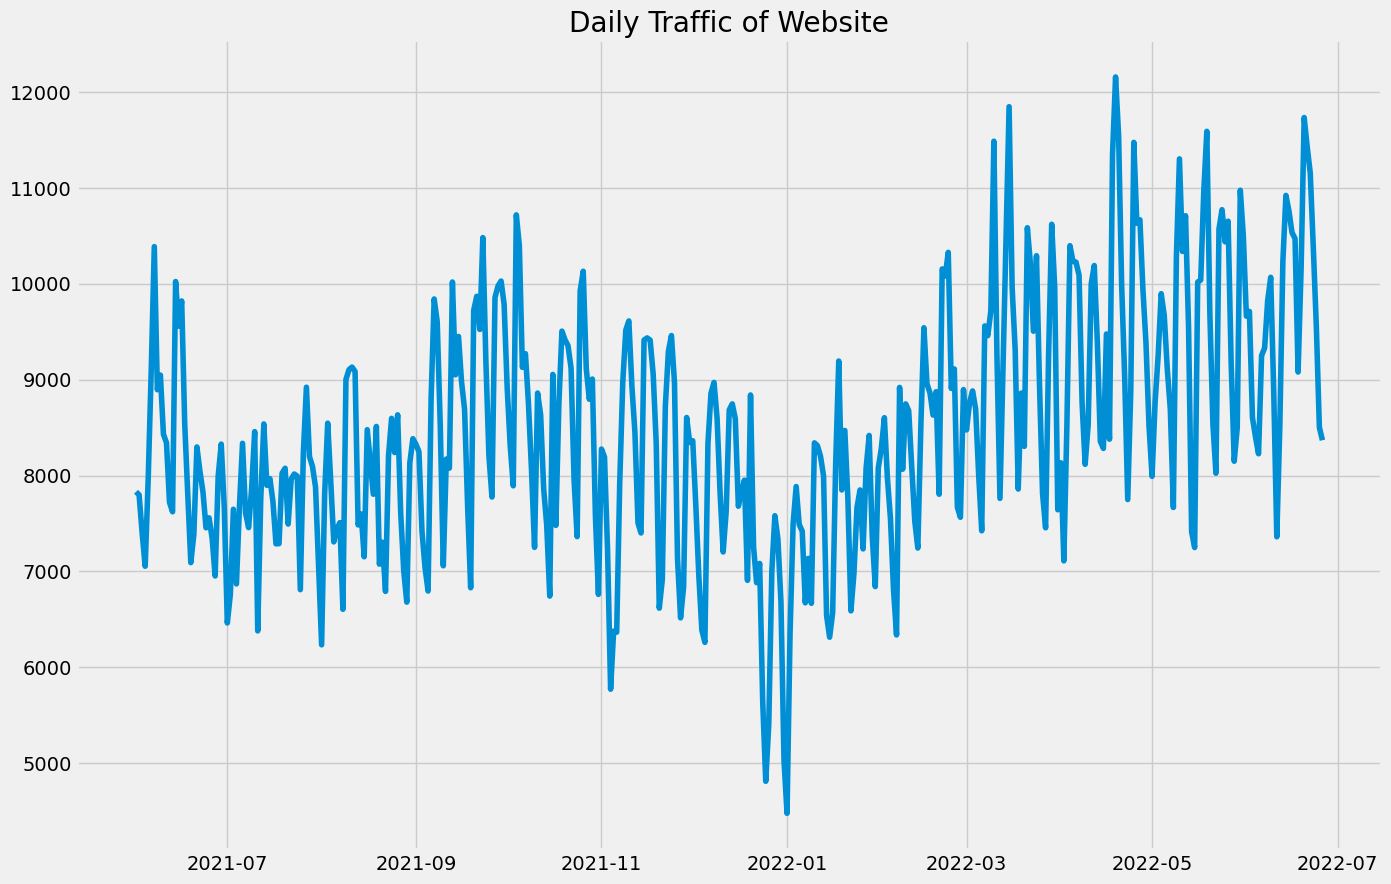

In [4]:
# Sitenin günlük trafiğine bakıyorum.
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of Website")
plt.show()

<Figure size 640x480 with 0 Axes>

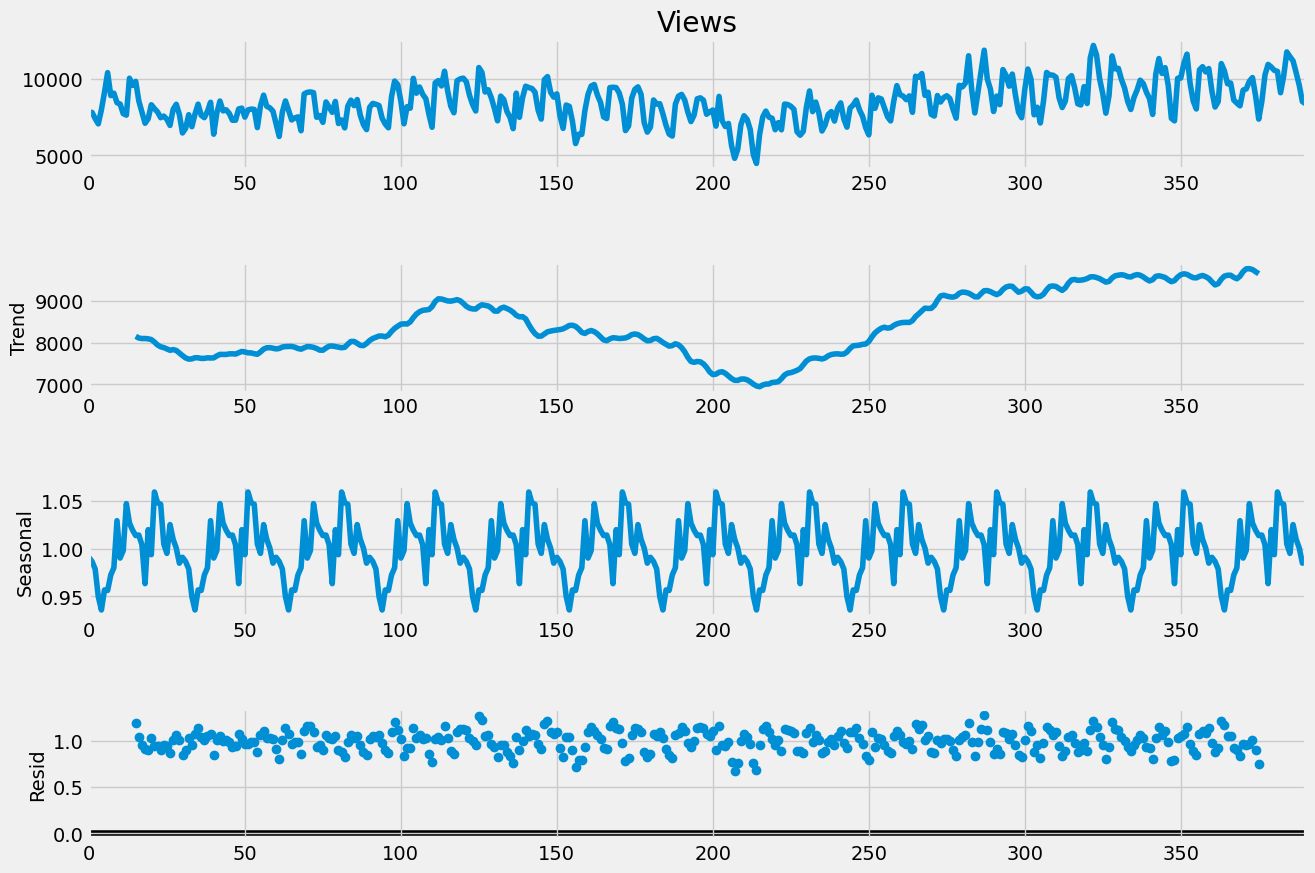

In [5]:
# Web sitesi trafik verilerimiz sezonluktur çünkü web sitesindeki trafik hafta içi artarken hafta sonu azalır. 
# Zaman Serisi Tahmini problemi üzerinde çalışırken veri setinin mevsimsel olup olmadığını bilmek değerlidir. 
# Aşağıda veri setimizin durağan mı yoksa mevsimsel mi olduğuna nasıl bakabileceğimizi görüyoruz:
result = seasonal_decompose(data["Views"], model="multiplicative", period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15,10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

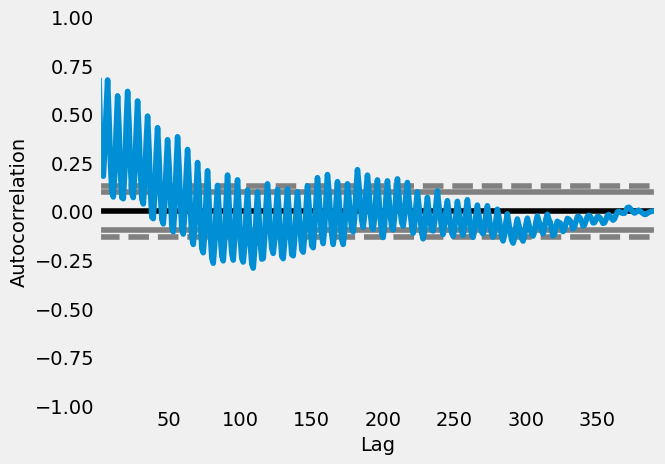

In [6]:
# Web sitesindeki trafiği tahmin etmek için Mevsimsel ARIMA (SARIMA) modelini kullanacağım. 
# SARIMA modelini kullanmadan önce p, d ve q değerlerinin bulunması gerekmektedir. 
# Veriler durağan olmadığından d'nin değeri 1'dir. p ve q değerlerini bulmak için otokorelasyon ve kısmi otokorelasyon grafiklerini kullanabiliriz:
pd.plotting.autocorrelation_plot(data["Views"])


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


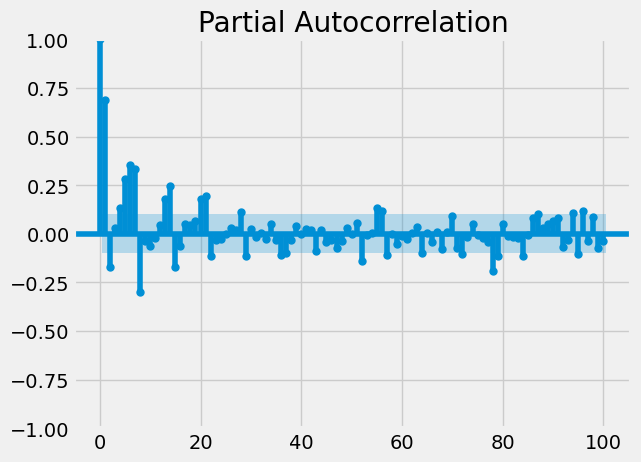

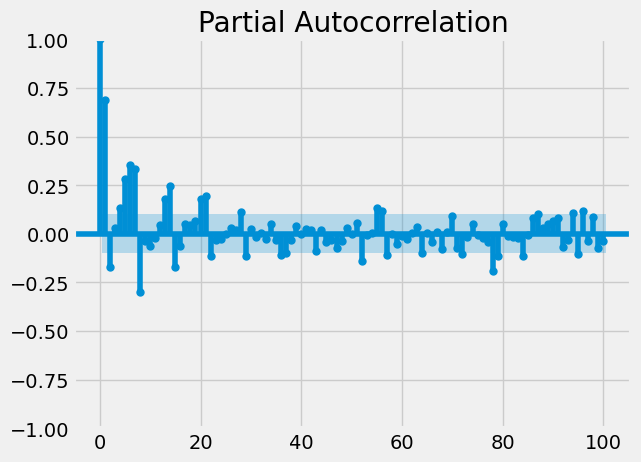

In [7]:
plot_pacf(data["Views"], lags=100)

In [8]:
# Şimdi web sitesi trafiği tahmini görevi için bir SARIMA modelini nasıl eğitebileceğimizi burada bulabilirsiniz:
p, d, q = 5, 1, 2
model = sm.tsa.statespace.SARIMAX(data["Views"], order = (p,d,q), seasonal_order = (p,d,q,12))
model = model.fit()
model.summary()

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.439
Date:                            Wed, 21 Aug 2024   AIC                           6228.878
Time:                                    11:40:13   BIC                           6287.901
Sample:                                         0   HQIC                          6252.304
                                            - 391                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7623      0.132      5.771      0.000       0.503       1.021
ar.L2         -0.7589      0.134     -5.659      0.000      -1.022      -0.496
ar.L3         -0.1926      0.168     -1.149      0.251      -0.521       0.136
ar.L4         -0.1555      0.151     -1.030      0.303      -0.451       0.140
ar.L5         -0.1648      0.137     -1.199      0.231      -0.434       0.105
ma.L1         -1.1790      0.092    -12.768      0.000      -1.360      -0.998
ma.L2          0.8878      0.077     11.562      0.000       0.737       1.038
ar.S.L12      -0.2424      3.869     -0.063      0.950      -7.826       7.341
ar.S.L24       0.0618      0.610      0.101      0.919      -1.134       1.257
ar.S.L36      -0.1760      0.262     -0.672      0.502      -0.689       0.337
ar.S.L48      -0.2001      0.780     -0.256      0.798      -1.729       1.329
ar.S.L60       0.0210      0.794      0.026      0.979      -1.536       1.578
ma.S.L12      -0.6959      3.873     -0.180      0.857      -8.287       6.896
ma.S.L24      -0.1022      3.066     -0.033      0.973      -6.112       5.907
sigma2      1.257e+06   1.59e+05      7.909      0.000    9.45e+05    1.57e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.30
Prob(Q):                              0.84   Prob(JB):                         0.52
Heteroskedasticity (H):               1.04   Skew:                             0.14
Prob(H) (two-sided):                  0.82   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.41e+14. Standard errors may be unstable.
"""

In [9]:
# Şimdi önümüzdeki 50 gün boyunca web sitesindeki trafiği tahmin edelim:
predictions = model.predict(len(data), len(data)+50)
print(predictions)

391     9869.674470
392    10787.889083
393    10773.496101
394     9857.756074
395     8748.196381
396     8210.540939
397     8931.673302
398     9700.236261
399    10285.773053
400    10637.355709
401     9871.046325
402     9339.444336
403     9004.050497
404     9078.384015
405    10541.155395
406    11011.707588
407    10920.686866
408    10105.105889
409     9432.378921
410     8614.333181
411     9176.447493
412    10387.576365
413    10620.613175
414    10792.407300
415    10245.893478
416     9425.044829
417     9005.630130
418     9146.158220
419     9895.209249
420    10256.564290
421    10735.455860
422     9902.050871
423     9504.510801
424     9018.788759
425     8824.415639
426    10144.473317
427    10860.634814
428    10919.617183
429    10404.507155
430     9423.387378
431     8680.779053
432     8735.567105
433    10080.022705
434    10538.347442
435    10854.547948
436    10467.091027
437     9312.553721
438     9139.417090
439     9346.506083
440    10305.506426


<Axes: >

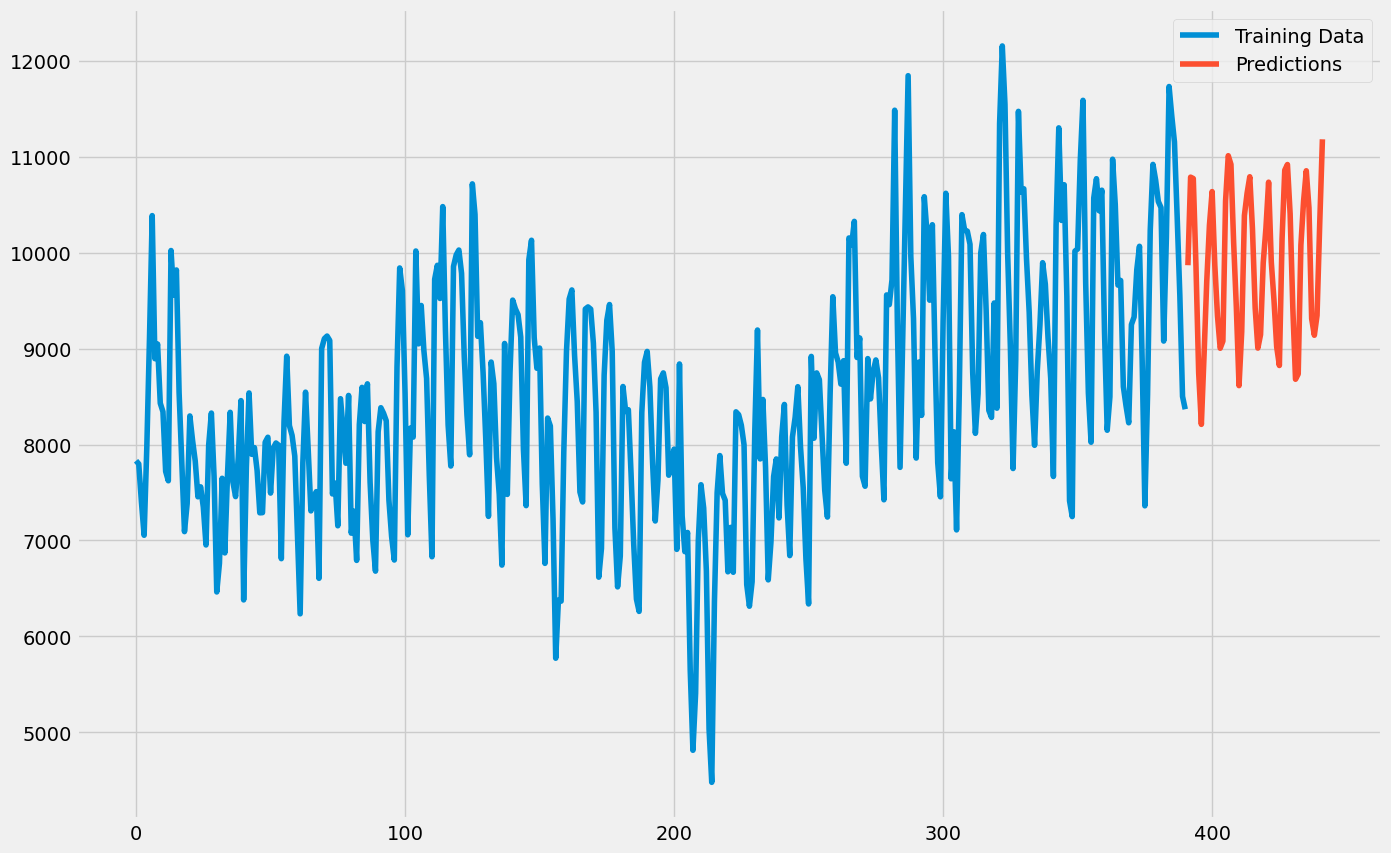

In [10]:
# Tahminleri şu şekilde planlayabiliriz:
data["Views"].plot(legend=True, label="Training Data", figsize=(15,10))
predictions.plot(legend=True, label="Predictions")